In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import yfinance as yf
import seaborn as sns

In [179]:
start = '2010-12-15'
end = '2020-12-15'
tickers = ['TSLA','AAPL','SBUX','AMZN']
interval = "1d"
portfolio_stocks =yf.download(tickers,start,end,interval)

[*********************100%***********************]  4 of 4 completed


In [180]:
volume = portfolio_stocks['Volume']
volume

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-15,417312000,116210000,13788000,11143500
2010-12-16,322030800,82430000,16072000,11851500
2010-12-17,386929200,90146000,17918400,12195000
2010-12-20,385610400,174706000,8660000,7851000
2010-12-21,256354000,102220000,7347000,11665500
...,...,...,...,...
2020-12-08,82225500,65726000,3911300,192795000
2020-12-09,115089200,82016000,6629900,213873600
2020-12-10,81312200,60604000,12939200,201249600


In [181]:
stocks = portfolio_stocks['Adj Close']
stocks

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-15,9.752877,8.778500,12.973446,1.973333
2010-12-16,9.779973,8.902000,13.266540,2.054000
2010-12-17,9.760489,8.879000,13.347956,2.090667
2010-12-20,9.809198,9.164500,13.404943,2.113333
2010-12-21,9.869781,9.237500,13.376451,2.150667
...,...,...,...,...
2020-12-08,122.904610,158.864502,97.252792,216.626663
2020-12-09,120.335442,155.210007,96.474457,201.493332
2020-12-10,121.778130,155.074493,101.269363,209.023331


In [182]:
returns = stocks.pct_change().dropna()*100
returns

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-16,0.277824,1.406856,2.259181,4.087850
2010-12-17,-0.199229,-0.258377,0.613695,1.785156
2010-12-20,0.499052,3.215458,0.426940,1.084151
2010-12-21,0.617606,0.796551,-0.212548,1.766592
2010-12-22,0.296138,0.005410,0.213001,1.146903
...,...,...,...,...
2020-12-08,0.509098,0.610835,-0.197224,1.265270
2020-12-09,-2.090376,-2.300385,-0.800322,-6.985904
2020-12-10,1.198889,-0.087310,4.970131,3.737096


In [183]:
def log_return(df):
    global log_returns
    log_returns = pd.DataFrame()
    for i in range(df.shape[1]):
        log_returns[df.columns[i]] = (np.log(df.iloc[:,i])-np.log(df.iloc[:,i]).shift(1)).dropna()
    return log_returns

In [184]:
log_return(stocks)

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-16,0.002774,0.013971,0.022340,0.040065
2010-12-17,-0.001994,-0.002587,0.006118,0.017694
2010-12-20,0.004978,0.031648,0.004260,0.010783
2010-12-21,0.006157,0.007934,-0.002128,0.017512
2010-12-22,0.002957,0.000054,0.002128,0.011404
...,...,...,...,...
2020-12-08,0.005078,0.006090,-0.001974,0.012573
2020-12-09,-0.021125,-0.023273,-0.008035,-0.072419
2020-12-10,0.011918,-0.000873,0.048506,0.036690


In [185]:
log_returns

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-16,0.002774,0.013971,0.022340,0.040065
2010-12-17,-0.001994,-0.002587,0.006118,0.017694
2010-12-20,0.004978,0.031648,0.004260,0.010783
2010-12-21,0.006157,0.007934,-0.002128,0.017512
2010-12-22,0.002957,0.000054,0.002128,0.011404
...,...,...,...,...
2020-12-08,0.005078,0.006090,-0.001974,0.012573
2020-12-09,-0.021125,-0.023273,-0.008035,-0.072419
2020-12-10,0.011918,-0.000873,0.048506,0.036690


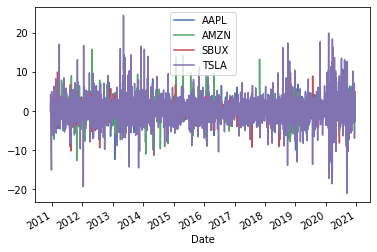

In [186]:
returns.plot()
plt.show()

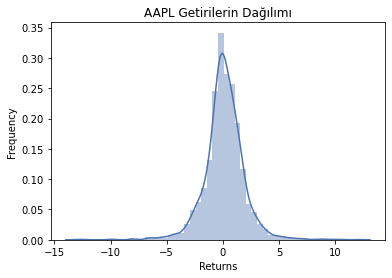

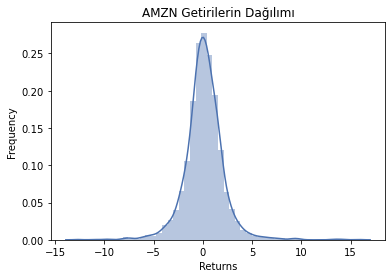

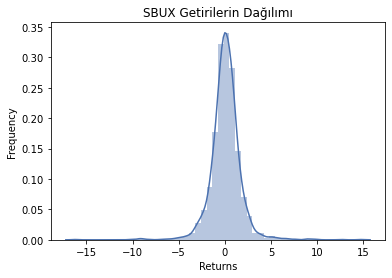

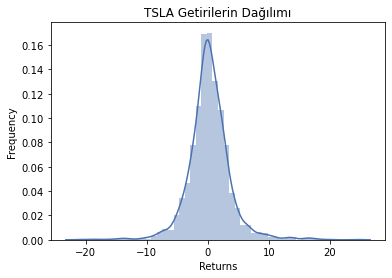

In [187]:
for i in returns.columns:
    ax = sns.distplot(returns[i],kde=True)
    ax.set(xlabel='Returns', ylabel='Frequency')
    ax.set_title(str(i)+' Getirilerin Dağılımı')
    plt.show()

In [188]:
log_returns.std()

AAPL    0.017898
AMZN    0.019863
SBUX    0.016495
TSLA    0.034861
dtype: float64

In [189]:
log_return(stocks).mean()

AAPL    0.000999
AMZN    0.001148
SBUX    0.000809
TSLA    0.001861
dtype: float64

In [190]:
def standart_sapma(df):
    global standart_sapma_tablosu
    standart_sapma_tablosu = pd.DataFrame()
    for i in df.columns:
        standart_sapma_tablosu.loc['standart_sapma',i] = df.loc[:,i].std()
    return standart_sapma_tablosu

In [191]:
standart_sapma(log_returns)

,AAPL,AMZN,SBUX,TSLA
standart_sapma,0.017898,0.019863,0.016495,0.034861


# KORELASYON DEĞERLERİ

In [192]:
log_returns.corr()

,AAPL,AMZN,SBUX,TSLA
AAPL,1.000000,0.442956,0.425820,0.325441
AMZN,0.442956,1.000000,0.397964,0.331170
SBUX,0.425820,0.397964,1.000000,0.294398
TSLA,0.325441,0.331170,0.294398,1.000000


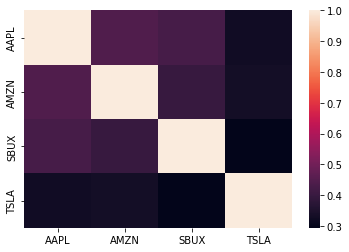

In [193]:
sns.heatmap(log_returns.corr());

In [194]:
ret_cov = returns.cov()
ret_cov

,AAPL,AMZN,SBUX,TSLA
AAPL,3.194327,1.573132,1.246971,2.001790
AMZN,1.573132,3.974032,1.294796,2.272450
SBUX,1.246971,1.294796,2.716773,1.666585
TSLA,2.001790,2.272450,1.666585,12.258906


# ÇARPIKLIK DEĞERLERİ 


In [195]:
returns.mean()

AAPL    0.115915
AMZN    0.134670
SBUX    0.094506
TSLA    0.247183
dtype: float64

In [196]:
returns.median()

AAPL    0.089524
AMZN    0.108650
SBUX    0.090711
TSLA    0.121251
dtype: float64

In [197]:
returns.skew()

AAPL   -0.133613
AMZN    0.409928
SBUX    0.035046
TSLA    0.387175
dtype: float64

Yukarıda APPLE(AAPL), AMAZON(AMZN), STARBUCKS(SBUX)ve TESLA(TSLA) şirketlerinin 2010 - 2020 yılları arasında getiri değerleri için çarpıklık katsayısı hesaplanmıştır.
Amazon'un bu yıllar arasında çarpıklık katsayısı pozitif, ortalaması medyandan büyüktür.Sağa çarpık bir grafik oluşturur. 
Starbucks'ın çarpıklık katsayısı diğerlerine göre daha düşük ve pozitiftir. Ortalaması küçük bir farkla medyandan büyüktür. Sağa çarpık diyebiliriz.
Tesla'nın ortalması medyandan büyüktür ve çarpıklık katsayısı pozitiftir.Sağa çarpık bir grafik oluşturur.



# BASIKLIK(KURTOSIS) DEĞERLERİ

In [198]:
returns.kurt()

AAPL     6.447925
AMZN     7.495895
SBUX    12.907798
TSLA     6.127326
dtype: float64

Apple, Amazon, Starbucks, Tesla şirketlerinin getiri değerleri için basıklık değerleri hesaplanmıştır.
Şirketlerin basıklık değerleri pozitiftir. Bu sebeple tüm şirketler sivribasık bir grafik oluşturur.
Özellikle basıklık değeri en yüksek olan Starbucks verilerinde aykırı değer olduğundan söz edebiliriz.

In [199]:
returns.median()

AAPL    0.089524
AMZN    0.108650
SBUX    0.090711
TSLA    0.121251
dtype: float64

In [200]:
returns.quantile(0.25)

AAPL   -0.694336
AMZN   -0.815778
SBUX   -0.664450
TSLA   -1.438557
Name: 0.25, dtype: float64

In [201]:
returns.quantile(0.75)

AAPL    1.028460
AMZN    1.149617
SBUX    0.870780
TSLA    1.870102
Name: 0.75, dtype: float64

In [202]:
returns[returns['AAPL']==returns['AAPL']]

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-16,0.277824,1.406856,2.259181,4.087850
2010-12-17,-0.199229,-0.258377,0.613695,1.785156
2010-12-20,0.499052,3.215458,0.426940,1.084151
2010-12-21,0.617606,0.796551,-0.212548,1.766592
2010-12-22,0.296138,0.005410,0.213001,1.146903
...,...,...,...,...
2020-12-08,0.509098,0.610835,-0.197224,1.265270
2020-12-09,-2.090376,-2.300385,-0.800322,-6.985904
2020-12-10,1.198889,-0.087310,4.970131,3.737096


In [351]:
def en_dusuk_getiri(df):
    global en_dusuk_getiri
    en_dusuk_getiri = pd.DataFrame(index= tickers,columns=['tarih','getiri'])
    for i in df.columns:
        en_dusuk_getiri.loc[i,'tarih'] = returns[returns[i]==returns[i].min()][i].index[0].strftime("%d/%m/%Y")
        en_dusuk_getiri.loc[i,'getiri']=returns[returns[i]==returns[i].min()][i].values[0]
    return en_dusuk_getiri

In [354]:
def en_yuksek_getiri(df):
    global en_yuksek_getiri
    en_yuksek_getiri = pd.DataFrame(index= tickers,columns=['tarih','getiri'])
    for i in df.columns:
        en_yuksek_getiri.loc[i,'tarih'] = returns[returns[i]==returns[i].max()][i].index[0].strftime("%d/%m/%Y")
        en_yuksek_getiri.loc[i,'getiri']=returns[returns[i]==returns[i].max()][i].values[0]
    return en_yuksek_getiri

In [355]:
def en_düşük_fiy (df):
    global en_düşük_fiyat
    en_düşük_fiyat = pd.DataFrame(index=tickers,columns=['tarih','fiyat'])
    for i in df.columns:
        en_düşük_fiyat.loc[i,'tarih'] =df[df[i]==df[i].min()].index[0].strftime("%d/%m/%Y")
        en_düşük_fiyat.loc[i,'fiyat'] =df[i].min()
    return en_düşük_fiyat

In [356]:
def en_yüksek_fiy (df):
    global en_yüksek_fiyat
    en_yüksek_fiyat = pd.DataFrame(index=tickers,columns=['tarih','fiyat'])
    for i in df.columns:
        en_yüksek_fiyat.loc[i,'tarih'] =df[df[i]==df[i].max()].index[0].strftime("%d/%m/%Y")
        en_yüksek_fiyat.loc[i,'fiyat'] =df[i].max()
    return en_yüksek_fiyat

In [297]:
returns['eşit_ağırlıklı_port']=0.25*returns["TSLA"]+0.25*returns["AAPL"]+0.25*returns["AMZN"]+0.25*returns["SBUX"]

In [298]:
returns

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,gün,ay,year,optimal_portfolio
Date,,,,,,,,,
2010-12-16,0.277824,1.406856,2.259181,4.087850,2.007928,Thursday,December,2010,1.885985
2010-12-17,-0.199229,-0.258377,0.613695,1.785156,0.485311,Friday,December,2010,0.397507
2010-12-20,0.499052,3.215458,0.426940,1.084151,1.306400,Monday,December,2010,1.488421
2010-12-21,0.617606,0.796551,-0.212548,1.766592,0.742050,Tuesday,December,2010,0.816079
2010-12-22,0.296138,0.005410,0.213001,1.146903,0.415363,Wednesday,December,2010,0.396856
...,...,...,...,...,...,...,...,...,...
2020-12-08,0.509098,0.610835,-0.197224,1.265270,0.546995,Tuesday,December,2020,0.608268
2020-12-09,-2.090376,-2.300385,-0.800322,-6.985904,-3.044247,Wednesday,December,2020,-3.131754
2020-12-10,1.198889,-0.087310,4.970131,3.737096,2.454701,Thursday,December,2020,2.029588


In [299]:
en_yüksek_fiyat = en_yüksek_fiy(stocks)
en_yüksek_fiyat

,tarih,fiyat
TSLA,08/12/2020,216.626663
AAPL,01/09/2020,132.360001
SBUX,10/12/2020,101.269363
AMZN,02/09/2020,176.572495


In [300]:
en_düşük_fiyat = en_düşük_fiy(stocks)
en_düşük_fiyat

,tarih,fiyat
TSLA,23/02/2011,1.455333
AAPL,20/06/2011,9.599445
SBUX,31/01/2011,12.835041
AMZN,17/03/2011,8.0485


In [301]:
en_yuksek_getiri = en_yuksek_getiri(returns)
en_yuksek_getiri

,tarih,getiri
TSLA,09/05/2013,24.395076
AAPL,13/03/2020,11.980825
SBUX,24/03/2020,14.730305
AMZN,27/04/2012,15.745693
eşit_ağırlıklı_port,24/03/2020,10.750809
gün,22/12/2010,Wednesday
ay,01/09/2011,September
year,02/01/2020,2020
optimal_portfolio,24/03/2020,9.769057


In [302]:
en_dusuk_getiri = en_dusuk_getiri(returns)
en_dusuk_getiri

,tarih,getiri
TSLA,08/09/2020,-21.062824
AAPL,16/03/2020,-12.864691
SBUX,16/03/2020,-16.204256
AMZN,26/10/2011,-12.656835
eşit_ağırlıklı_port,16/03/2020,-13.254126
gün,17/12/2010,Friday
ay,01/04/2011,April
year,16/12/2010,2010
optimal_portfolio,16/03/2020,-12.430357


In [303]:
returns['gün'] = returns.index.day_name()

In [304]:
returns['ay'] = returns.index.month_name()

In [305]:
returns['year'] = returns.index.year

In [306]:
returns

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,gün,ay,year,optimal_portfolio
Date,,,,,,,,,
2010-12-16,0.277824,1.406856,2.259181,4.087850,2.007928,Thursday,December,2010,1.885985
2010-12-17,-0.199229,-0.258377,0.613695,1.785156,0.485311,Friday,December,2010,0.397507
2010-12-20,0.499052,3.215458,0.426940,1.084151,1.306400,Monday,December,2010,1.488421
2010-12-21,0.617606,0.796551,-0.212548,1.766592,0.742050,Tuesday,December,2010,0.816079
2010-12-22,0.296138,0.005410,0.213001,1.146903,0.415363,Wednesday,December,2010,0.396856
...,...,...,...,...,...,...,...,...,...
2020-12-08,0.509098,0.610835,-0.197224,1.265270,0.546995,Tuesday,December,2020,0.608268
2020-12-09,-2.090376,-2.300385,-0.800322,-6.985904,-3.044247,Wednesday,December,2020,-3.131754
2020-12-10,1.198889,-0.087310,4.970131,3.737096,2.454701,Thursday,December,2020,2.029588


In [307]:
returns.groupby('gün').mean() #dataframe i gün bazında gruplayıp hisse senetlerinin ortalamasını getirdik.

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,year,optimal_portfolio
gün,,,,,,,
Friday,-0.093143,0.082594,0.111853,-0.093300,0.002001,2015.456522,-0.003788
Monday,0.379360,0.057529,-0.055063,0.569494,0.237830,2015.475687,0.252049
Thursday,-0.064669,0.140169,0.149274,0.250010,0.118696,2015.450787,0.111746
Tuesday,0.191668,0.277243,0.178012,0.471587,0.279627,2015.458252,0.284395
Wednesday,0.181863,0.108638,0.077271,0.058128,0.106475,2015.447471,0.111436


In [308]:
returns.groupby('gün').min()

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,ay,year,optimal_portfolio
gün,,,,,,,,
Friday,-6.633069,-10.997244,-9.408393,-19.327435,-5.835576,April,2010,-5.979357
Monday,-12.864691,-6.326358,-16.204256,-18.577806,-13.254126,April,2010,-12.430357
Thursday,-12.355787,-7.922083,-10.206733,-13.613708,-9.623100,April,2010,-9.548530
Tuesday,-7.992718,-5.865624,-4.588483,-21.062824,-8.295903,April,2010,-8.522859
Wednesday,-6.570676,-12.656835,-9.071912,-17.175839,-5.437421,April,2010,-5.161247


In [309]:
returns.groupby('gün').max() 

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,ay,year,optimal_portfolio
gün,,,,,,,,
Friday,11.980825,15.745693,12.592618,10.784777,7.138305,September,2020,6.827347
Monday,9.310058,7.929520,7.517828,19.894859,7.348755,September,2020,7.327216
Thursday,8.198195,8.914032,9.930551,24.395076,7.355708,September,2020,6.616588
Tuesday,10.032526,9.017685,14.730305,16.717859,10.750809,September,2020,9.769057
Wednesday,8.874136,9.445222,6.504407,13.123639,7.760390,September,2020,8.140240


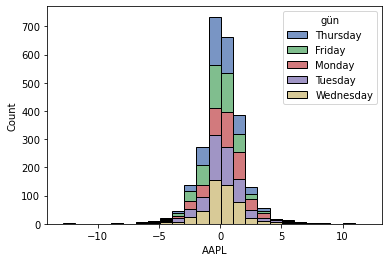

In [310]:
sns.histplot(data=returns, x="AAPL", hue='gün',bins=25, multiple="stack")
plt.show()

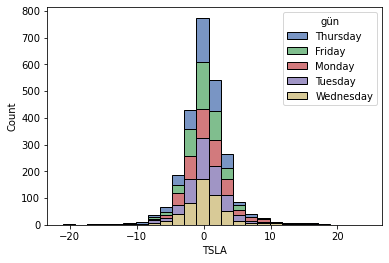

In [311]:
sns.histplot(data=returns, x="TSLA", hue='gün',bins=25, multiple="stack")
plt.show()

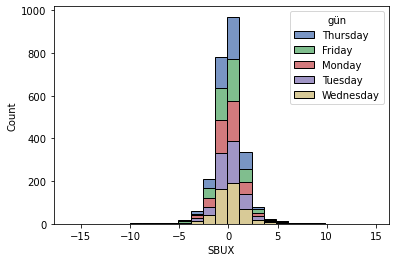

In [312]:
sns.histplot(data=returns, x="SBUX", hue='gün',bins=25, multiple="stack")
plt.show()

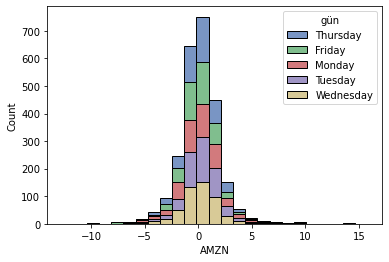

In [313]:
sns.histplot(data=returns, x="AMZN", hue='gün',bins=25, multiple="stack")
plt.show()

In [314]:
returns.groupby('ay').mean()

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,year,optimal_portfolio
ay,,,,,,,
April,0.072926,0.388894,0.131015,0.505316,0.274538,2015.512077,0.287355
August,0.309144,0.088925,0.083986,0.401747,0.220951,2015.472973,0.224820
December,-0.078393,-0.102500,0.028861,0.195878,0.010961,2014.947115,-0.001797
February,0.248064,-0.027392,0.052758,0.280014,0.138361,2015.484375,0.136474
January,0.036338,0.289638,0.036720,0.327539,0.172559,2015.529412,0.187175
July,0.340082,0.305643,0.103330,0.145320,0.223594,2015.528302,0.242902
June,0.002269,0.189689,0.018298,0.498947,0.177301,2015.502347,0.184694
March,0.123602,0.139871,0.165772,-0.033562,0.098921,2015.488479,0.097574
May,0.167962,0.072258,0.075716,0.285015,0.150238,2015.488263,0.150874


In [315]:
returns.groupby('ay').min()

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,gün,year,optimal_portfolio
ay,,,,,,,,
April,-6.257757,-9.882844,-5.324756,-8.234816,-5.065525,Friday,2011,-4.882328
August,-6.116275,-6.844279,-10.206733,-9.007339,-6.727923,Friday,2011,-6.367243
December,-6.435740,-5.865624,-3.313412,-15.088087,-3.872795,Friday,2010,-3.727008
February,-6.536828,-7.704182,-6.519140,-17.175839,-6.778828,Friday,2011,-6.923324
January,-12.355787,-10.997244,-4.337678,-19.327435,-4.992431,Friday,2011,-5.028117
July,-4.551641,-9.648362,-9.408393,-14.309290,-3.905031,Friday,2011,-4.022767
June,-4.801032,-4.640947,-9.071912,-10.450342,-5.356386,Friday,2011,-4.974833
March,-12.864691,-7.922083,-16.204256,-18.577806,-13.254126,Friday,2011,-12.430357
May,-5.811945,-7.597409,-3.831595,-11.303698,-5.835576,Friday,2011,-5.979357


In [316]:
returns.groupby('ay').max()

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,gün,year,optimal_portfolio
ay,,,,,,,,
April,8.874136,15.745693,7.517828,15.940896,7.140560,Wednesday,2020,6.989801
August,5.891020,9.017685,6.760665,16.188013,5.926780,Wednesday,2020,6.168111
December,7.042160,9.445222,5.729454,16.533784,7.760390,Wednesday,2020,8.140240
February,6.098035,4.598989,2.823431,19.894859,5.512806,Wednesday,2020,5.413616
January,6.833461,13.711591,6.623167,16.717859,5.109405,Wednesday,2020,5.073743
July,10.468872,9.797177,8.936024,13.479394,6.043329,Wednesday,2020,6.204808
June,3.658389,5.472974,5.250106,9.744784,4.257181,Wednesday,2020,4.180101
March,11.980825,7.026613,14.730305,18.387684,10.750809,Wednesday,2020,9.769057
May,5.825979,3.678046,4.755345,24.395076,6.003675,Wednesday,2020,5.845070


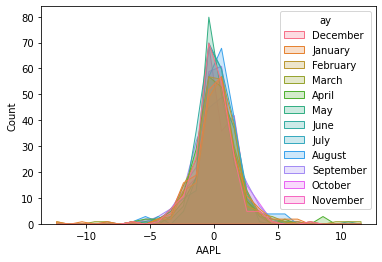

In [317]:
sns.histplot(data=returns, x="AAPL", hue='ay',bins=25, element="poly")
plt.show()

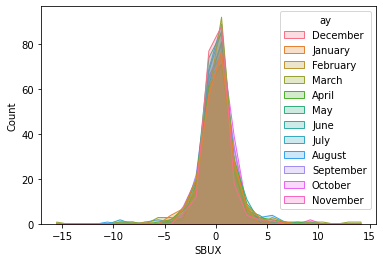

In [318]:
sns.histplot(data=returns, x="SBUX", hue='ay',bins=25, element="poly")
plt.show()

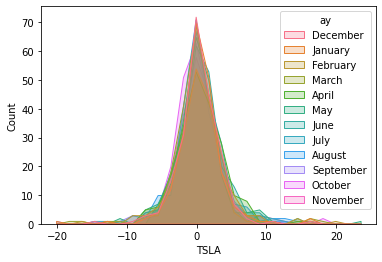

In [319]:
sns.histplot(data=returns, x="TSLA", hue='ay',bins=25, element="poly")
plt.show()

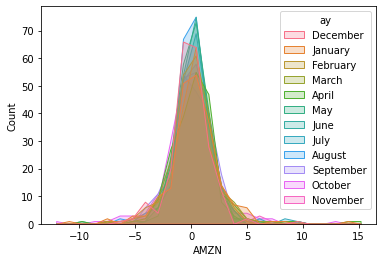

In [320]:
sns.histplot(data=returns, x="AMZN", hue='ay',bins=25, element="poly")
plt.show()

In [321]:
returns.groupby('year').min()

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,gün,ay,optimal_portfolio
year,,,,,,,,
2010,-0.501088,-1.504786,-0.910999,-15.088087,-3.872795,Friday,December,-3.727008
2011,-5.594003,-12.656835,-10.206733,-9.651947,-6.727923,Friday,April,-6.367243
2012,-6.435740,-7.704182,-9.408393,-19.327435,-4.697810,Friday,April,-4.427775
2013,-12.355787,-7.240621,-2.947473,-14.507091,-4.148601,Friday,April,-4.009466
2014,-7.992718,-10.997244,-3.283154,-11.303698,-3.677746,Friday,April,-3.804464
2015,-6.116275,-6.289556,-5.321642,-8.884613,-5.070221,Friday,April,-5.016589
2016,-6.570676,-7.609977,-6.519140,-10.450342,-5.703749,Friday,April,-5.587265
2017,-3.877702,-3.541885,-9.243713,-7.240087,-3.061795,Friday,April,-2.916325
2018,-6.633069,-7.819675,-9.071912,-13.901537,-4.331458,Friday,April,-4.542144


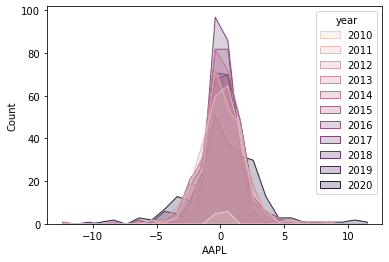

In [322]:
sns.histplot(data=returns, x="AAPL", hue='year',bins=25, element="poly")
plt.show()

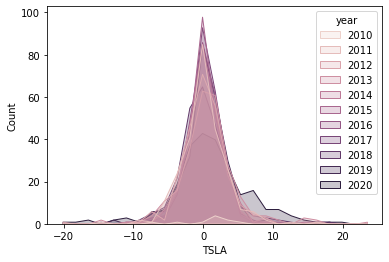

In [323]:
sns.histplot(data=returns, x="TSLA", hue='year',bins=25, element="poly")
plt.show()

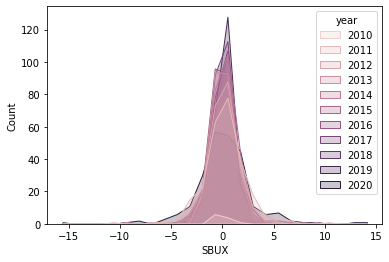

In [324]:
sns.histplot(data=returns, x="SBUX", hue='year',bins=25, element="poly")
plt.show()

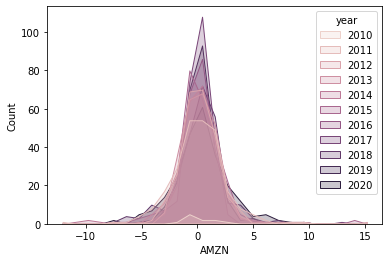

In [325]:
sns.histplot(data=returns, x="AMZN", hue='year',bins=25, element="poly")
plt.show()

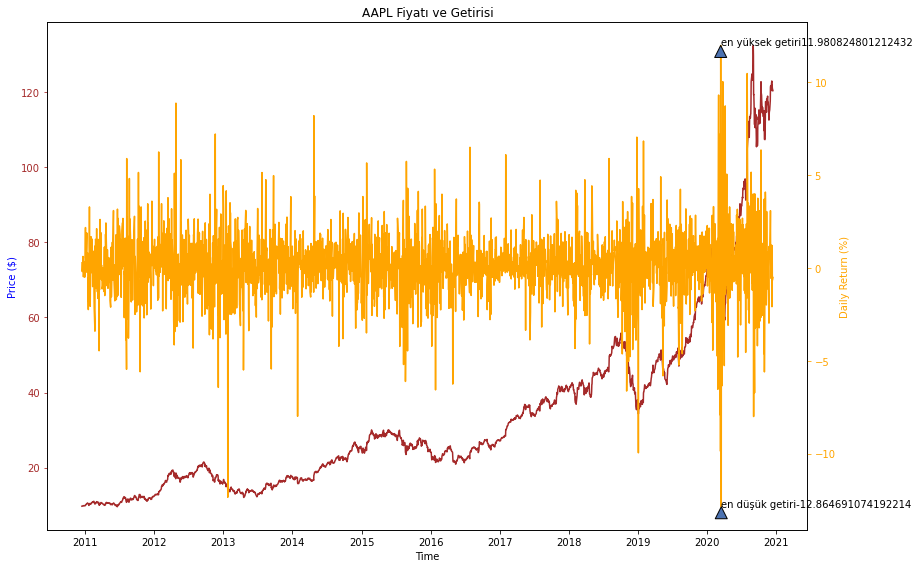

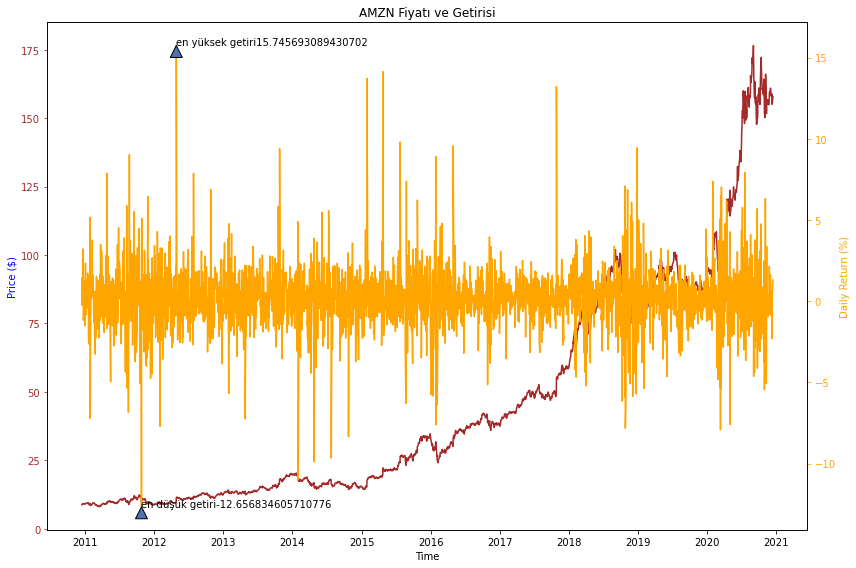

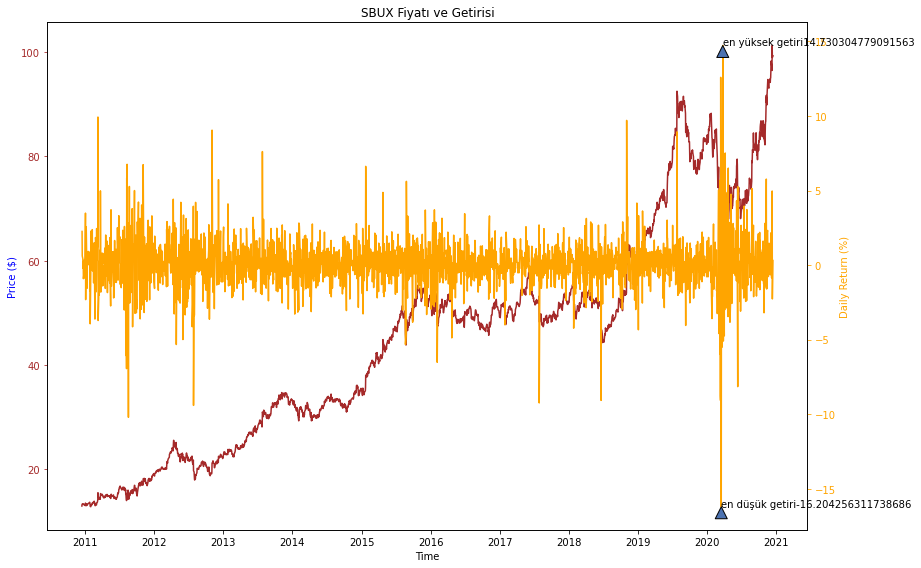

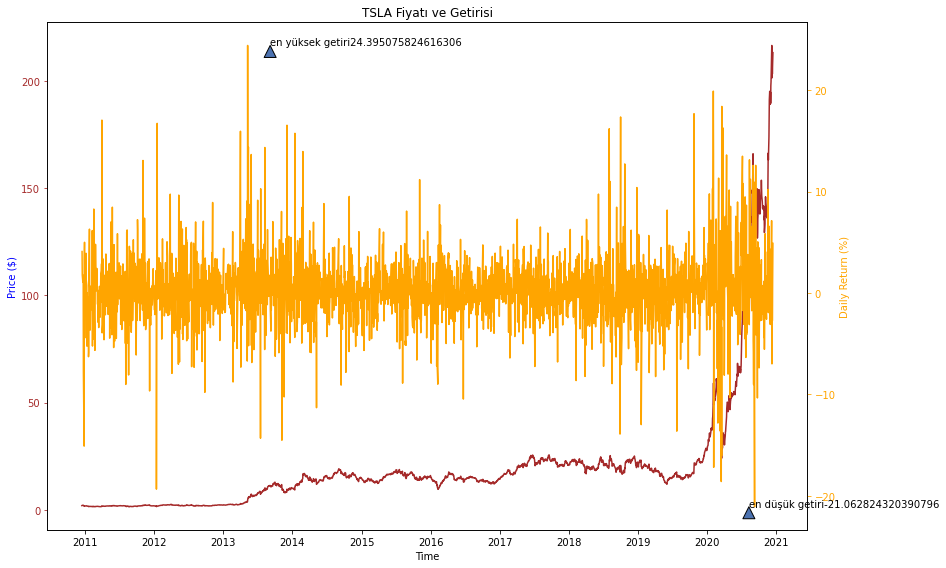

In [326]:
for i in returns.columns[0:4]:
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_title (str(i)+' Fiyatı ve Getirisi')
    ax.plot(stocks.index, stocks[i],'brown' )
    ax.set_xlabel('Time')
    ax.set_ylabel('Price ($)',color='b')
    ax.tick_params('y', colors='brown')
    ax2 = ax.twinx()
    ax2.plot(returns.index,returns[i],'orange')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Daily Return (%)',color='orange')
    ax2.tick_params('y', colors='orange')
    fig.tight_layout()
    ax2.annotate('en yüksek getiri'+ str(en_yuksek_getiri.loc[i,'getiri']) ,xy=(pd.Timestamp(str(en_yuksek_getiri.loc[i,'tarih'])),en_yuksek_getiri.loc[i,'getiri']),arrowprops={})
    ax2.annotate('en düşük getiri'+ str(en_dusuk_getiri.loc[i,'getiri']),xy=(pd.Timestamp(str(en_dusuk_getiri.loc[i,'tarih'])), en_dusuk_getiri.loc[i,'getiri']),arrowprops={})
    plt.show()          

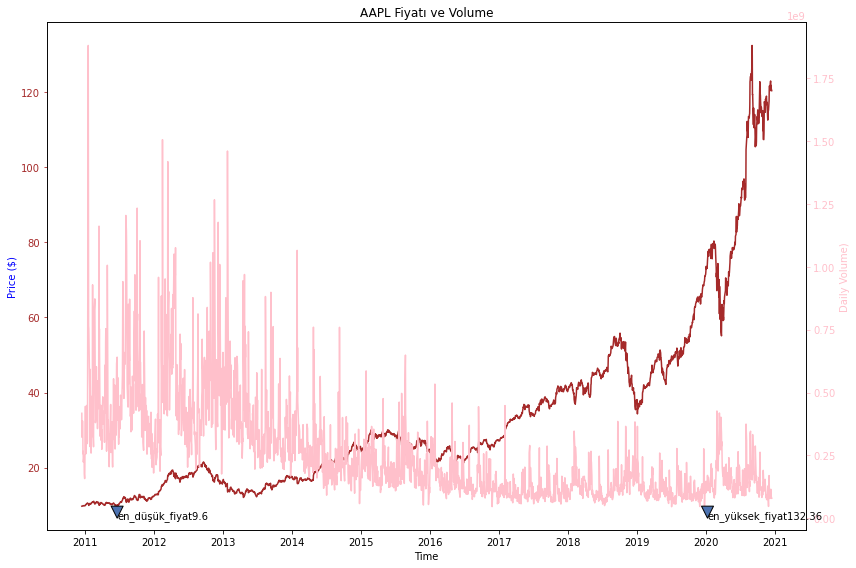

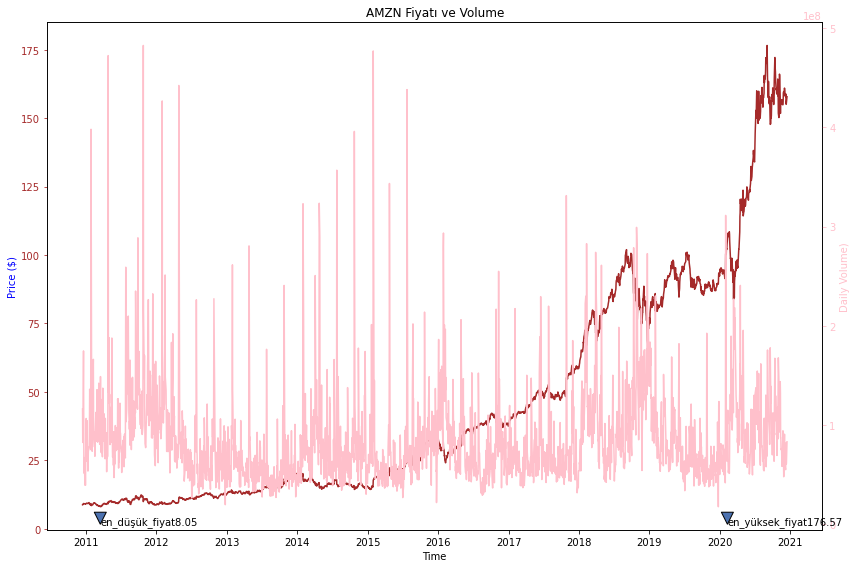

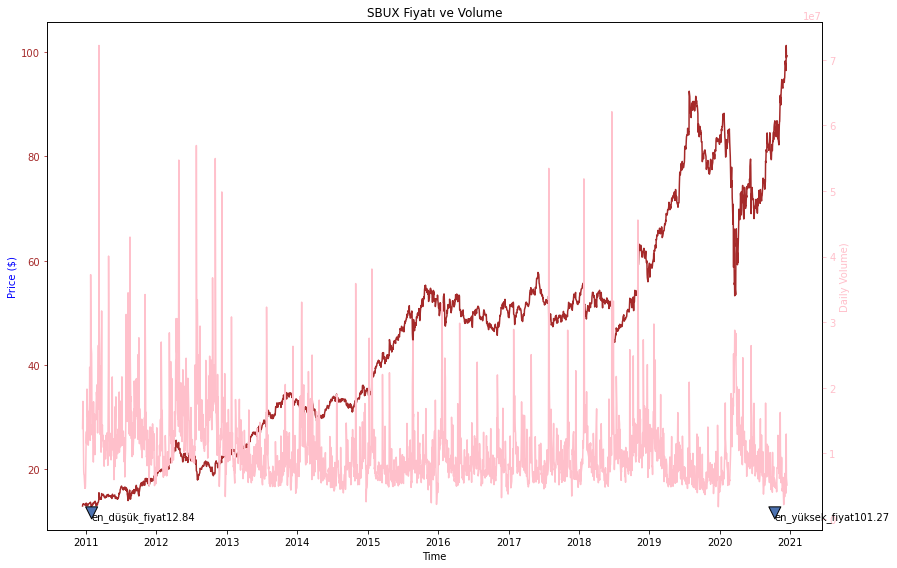

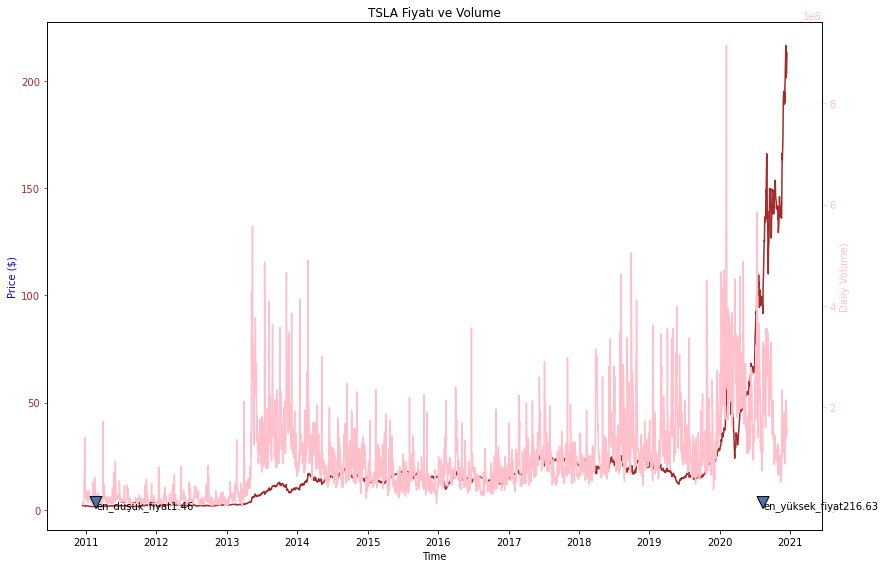

In [327]:
for i in returns.columns[0:4]:
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_title (str(i)+' Fiyatı ve Volume')
    ax.plot(stocks.index, stocks[i],'brown' )
    ax.set_xlabel('Time')
    ax.set_ylabel('Price ($)',color='b')
    ax.tick_params('y', colors='brown')
    ax2 = ax.twinx()
    ax2.plot(volume.index,volume[i],'pink')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Daily Volume)',color='pink')
    ax2.tick_params('y', colors='pink')
    fig.tight_layout()
    ax2.annotate('en_yüksek_fiyat'+ str(round(en_yüksek_fiyat.loc[i].values[1],2)) ,xy=(pd.Timestamp(str(en_yüksek_fiyat.loc[i].values[0])),en_yüksek_fiyat.loc[i].values[1]),arrowprops={})
    ax2.annotate('en_düşük_fiyat'+ str(round(en_düşük_fiyat.loc[i].values[1],2)),xy=(pd.Timestamp(str(en_düşük_fiyat.loc[i].values[0])),en_düşük_fiyat.loc[i].values[1]),arrowprops={})
    plt.show()

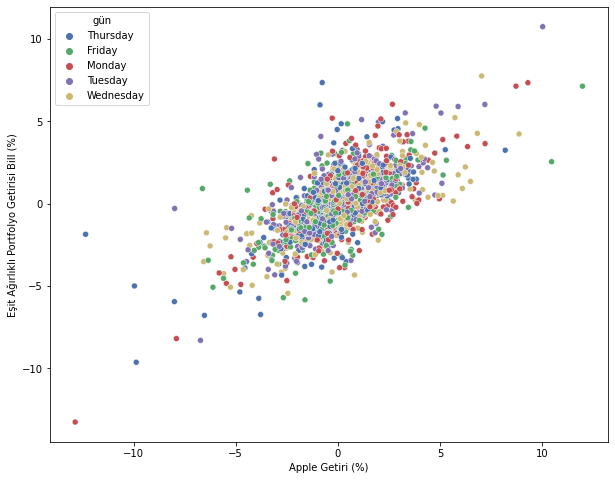

In [328]:
#hue seçeneği grafiği üçüncü bir değişkenle göstermemizi sağlar
fig, ax = plt.subplots()
fig.set_size_inches([10, 8])
sns.scatterplot(x="AAPL",y="eşit_ağırlıklı_port",data=returns,hue="gün")
ax.set_xlabel("Apple Getiri (%)")
ax.set_ylabel("Eşit Ağırlıklı Portfolyo Getirisi Bill (%)")
plt.show()

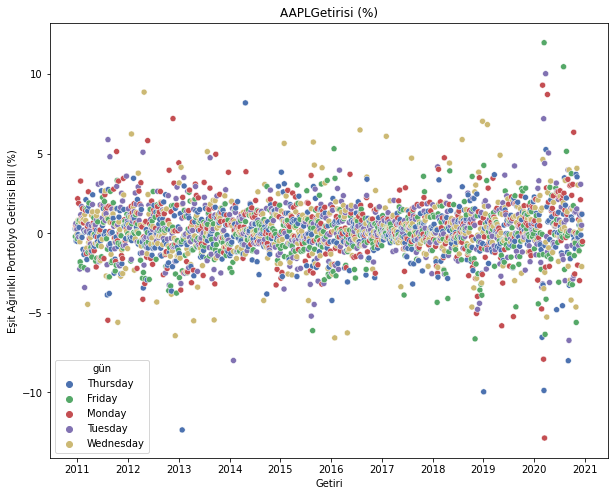

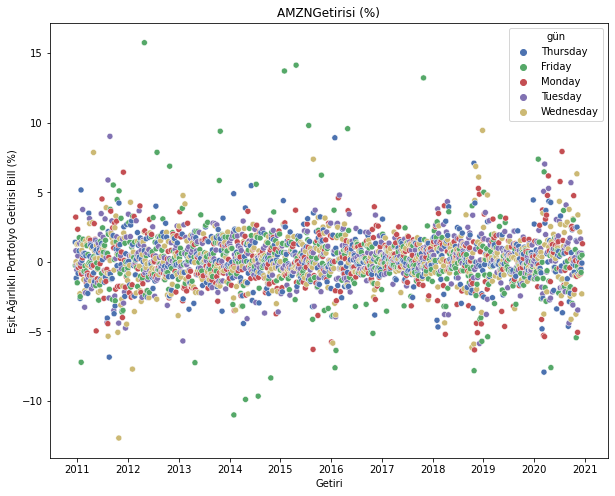

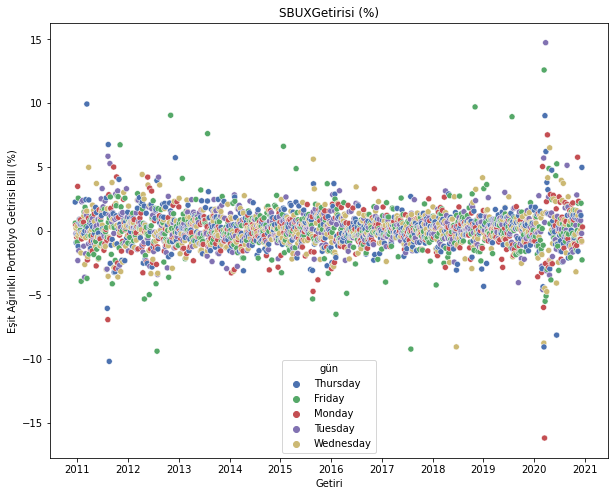

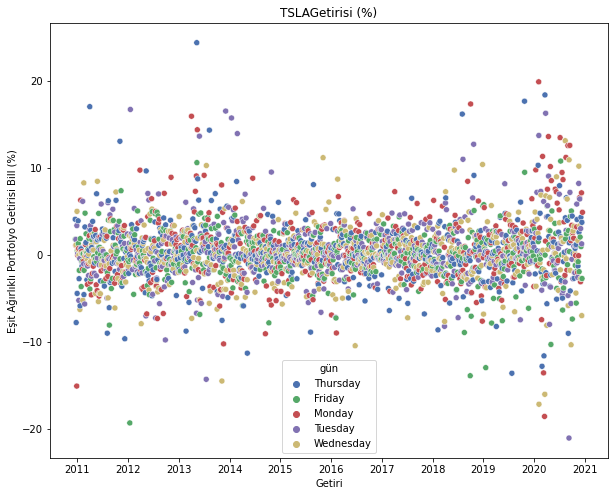

In [329]:
#hue seçeneği grafiği üçüncü bir değişkenle göstermemizi sağlar
for i in returns.columns[0:4]:
    fig, ax = plt.subplots()
    ax.set_title (str(i)+'Getirisi (%)')
    fig.set_size_inches([10,8])
    sns.scatterplot(returns.index,returns[i],data=returns,hue="gün")
    ax.set_xlabel("Getiri")
    ax.set_ylabel("Eşit Ağırlıklı Portfolyo Getirisi Bill (%)")
    plt.show()

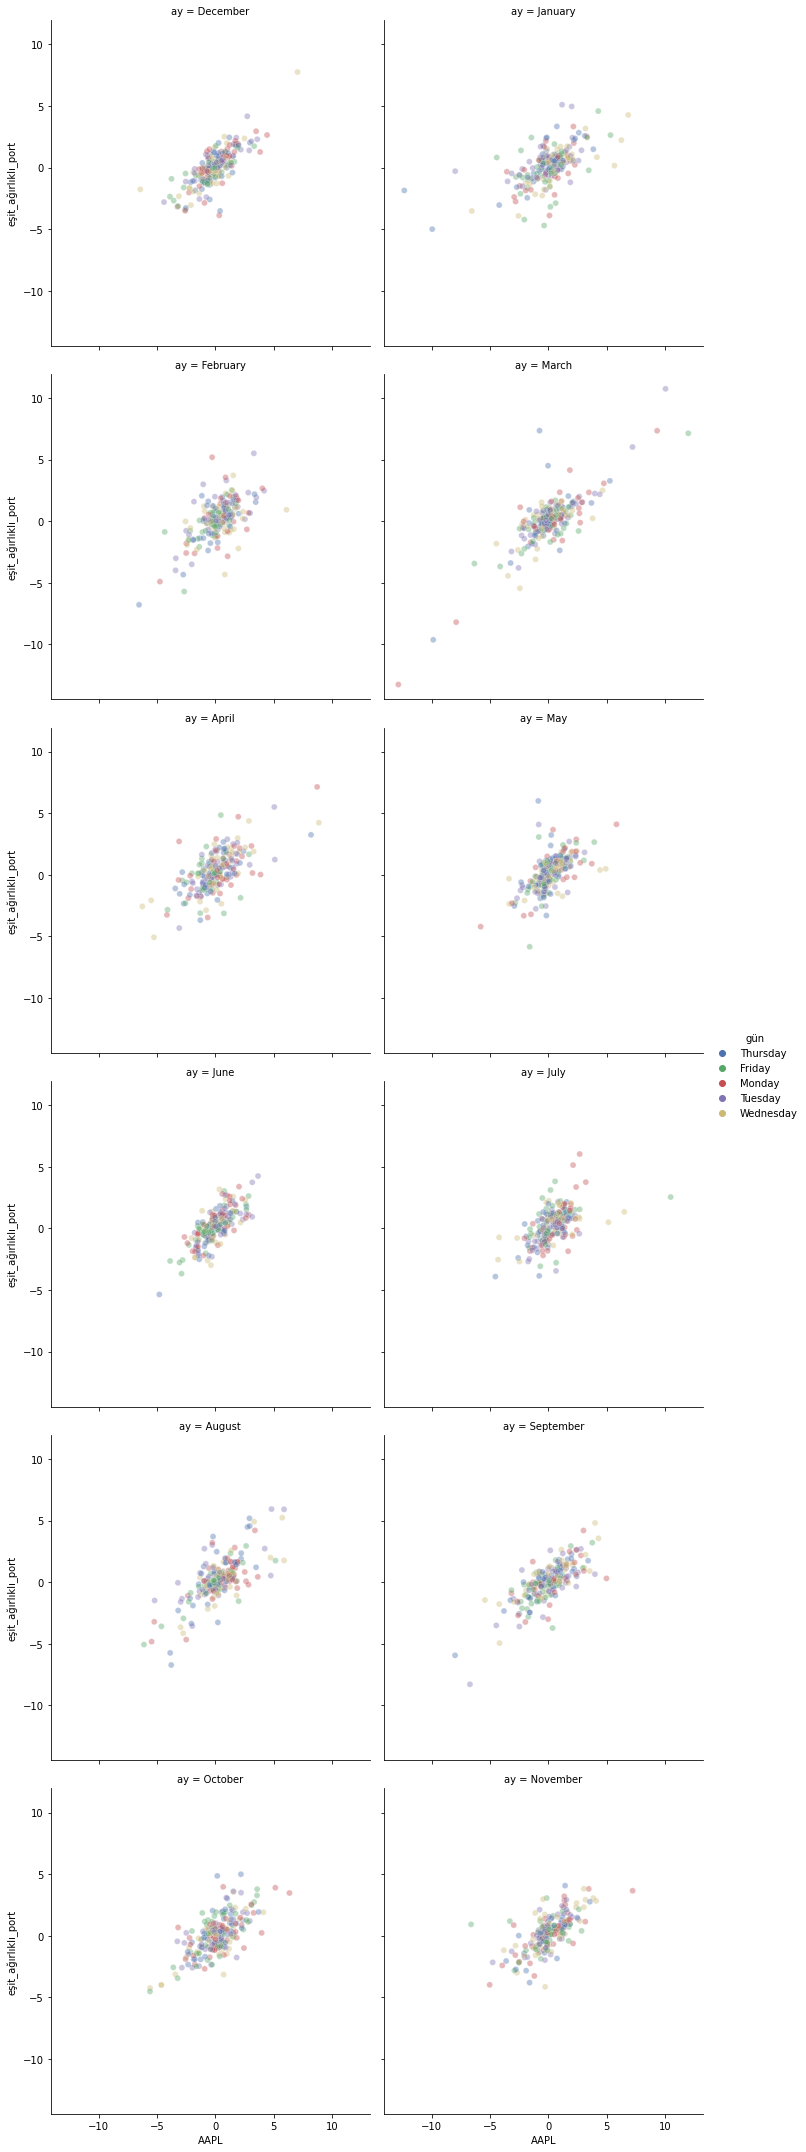

In [330]:

sns.relplot(data=returns, x="AAPL", y="eşit_ağırlıklı_port", hue="gün", col="ay", col_wrap=2,alpha=0.4)

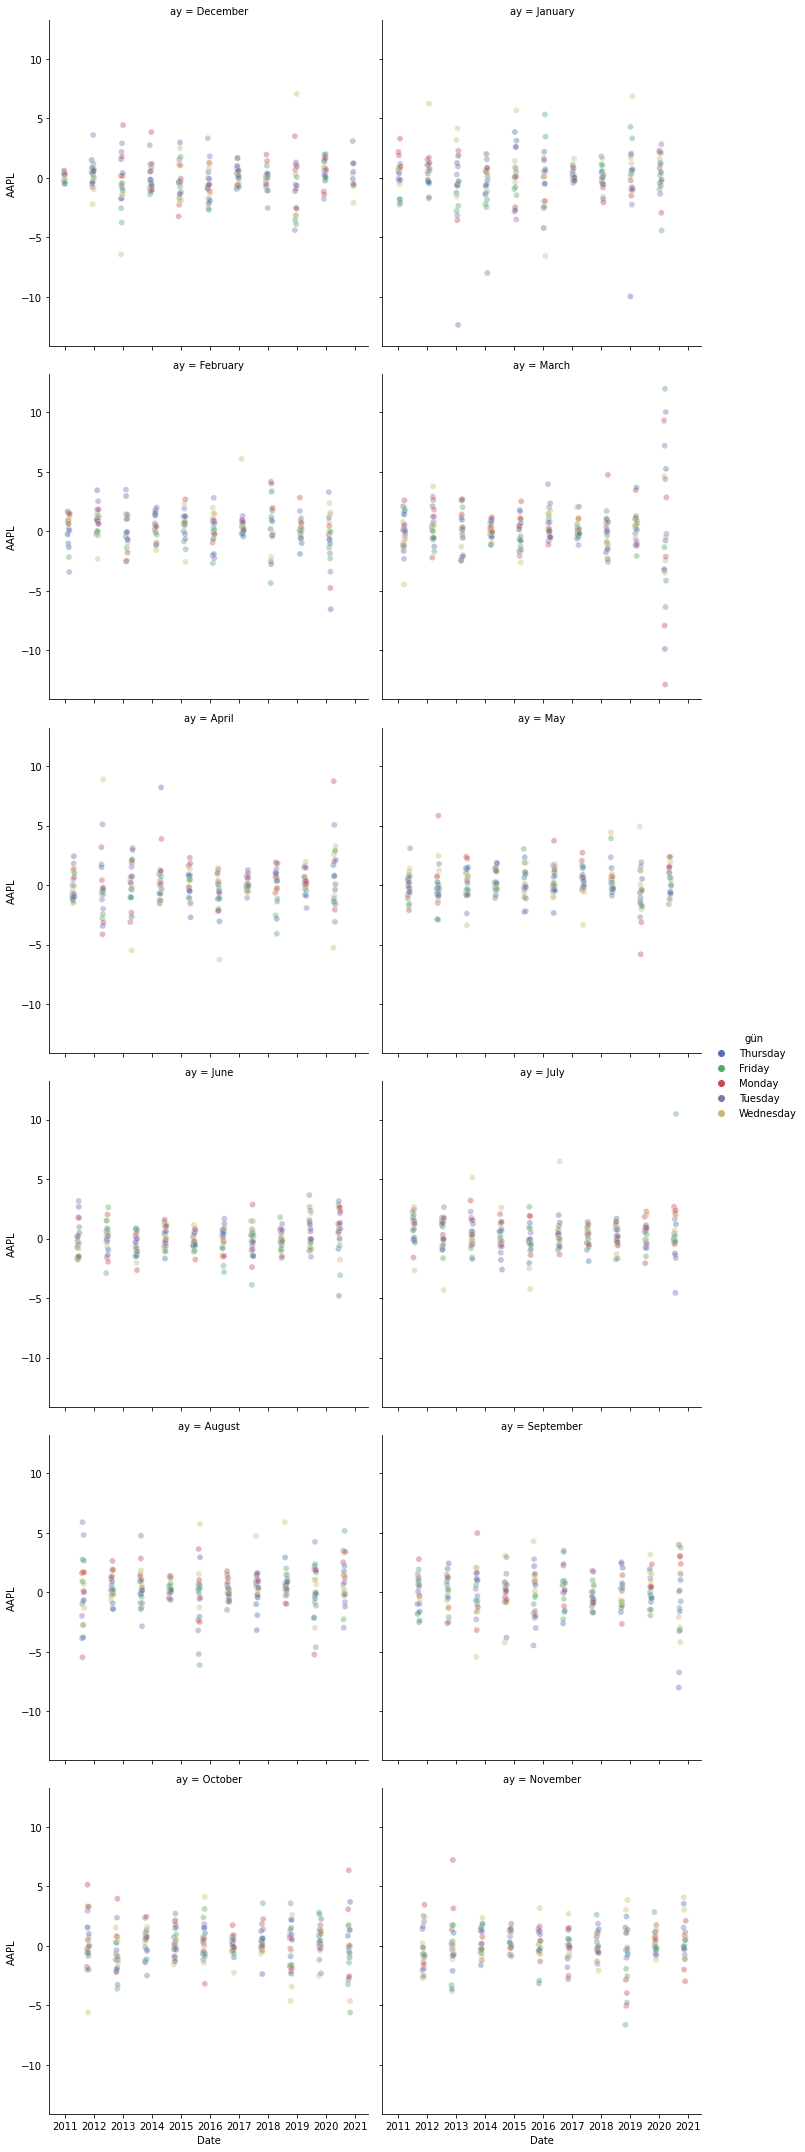

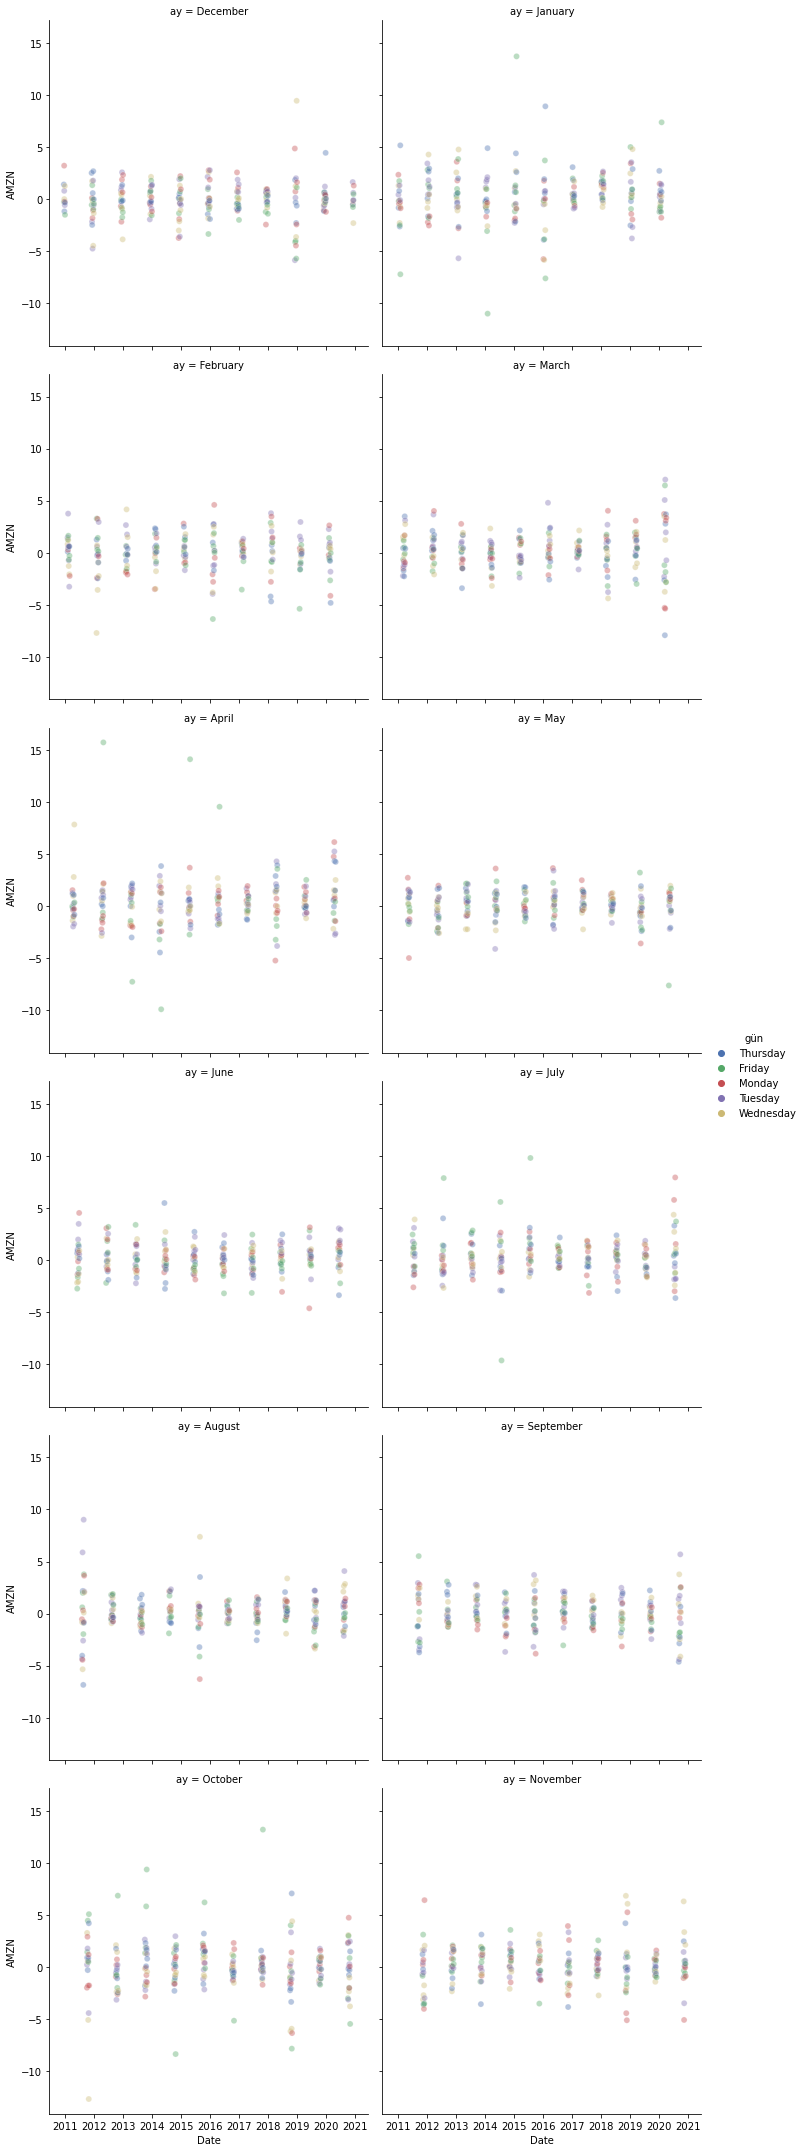

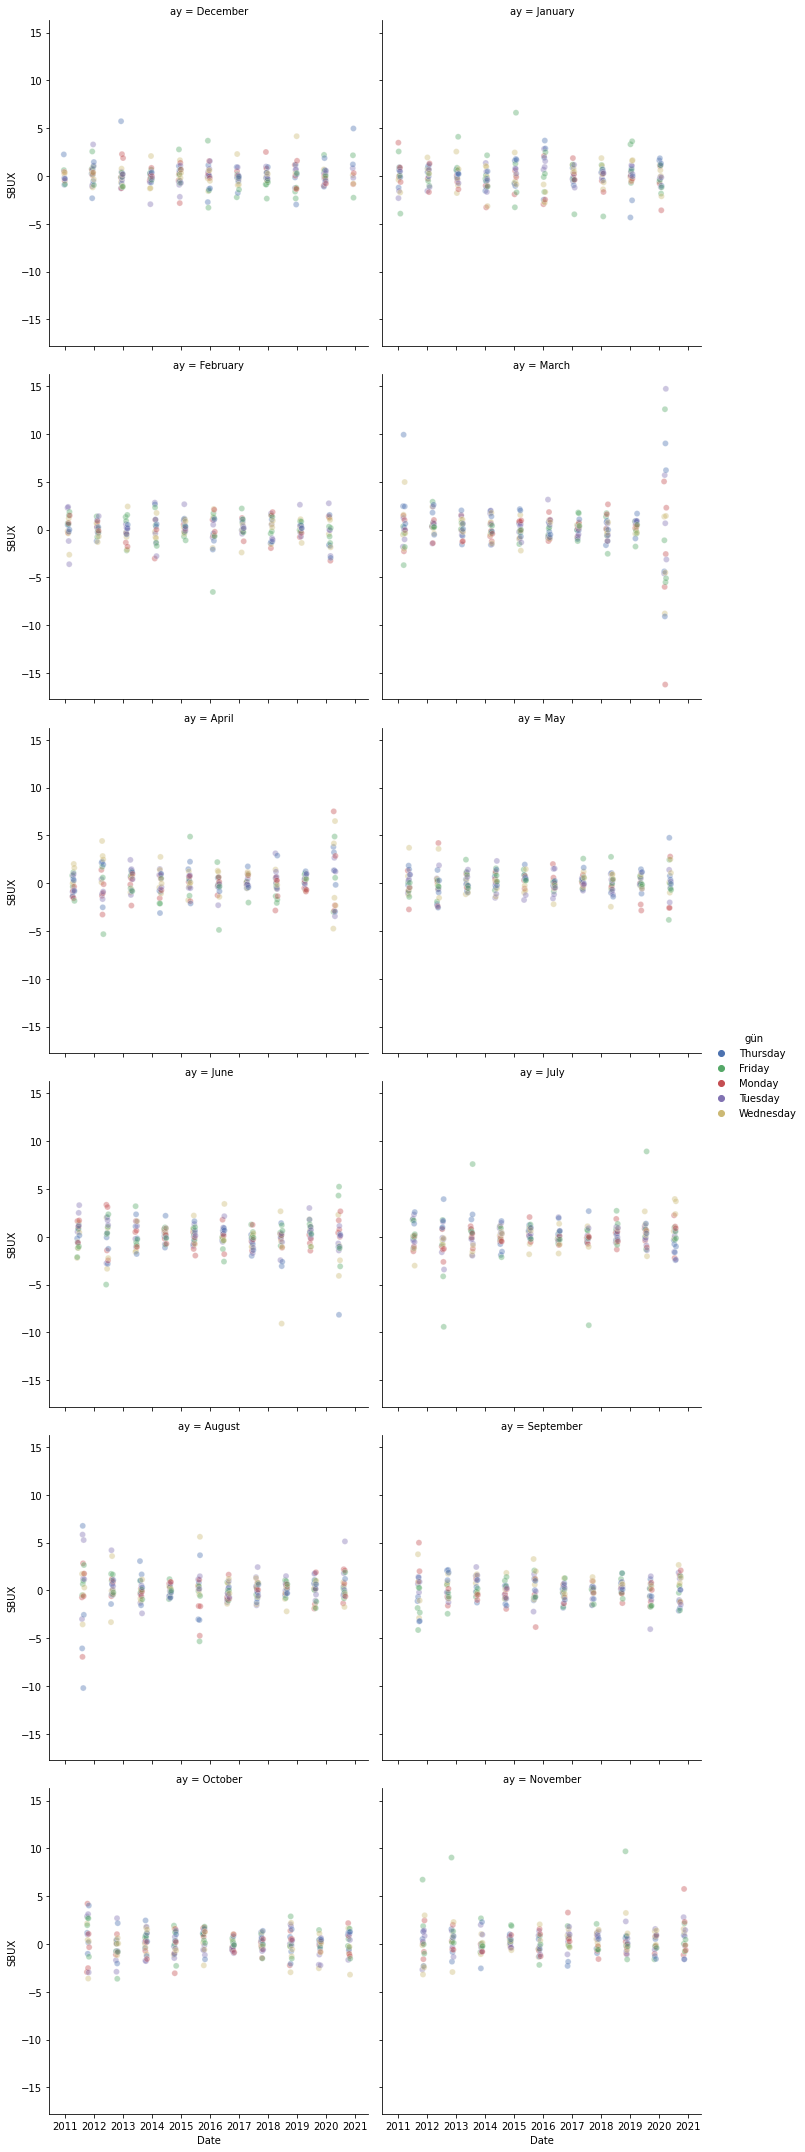

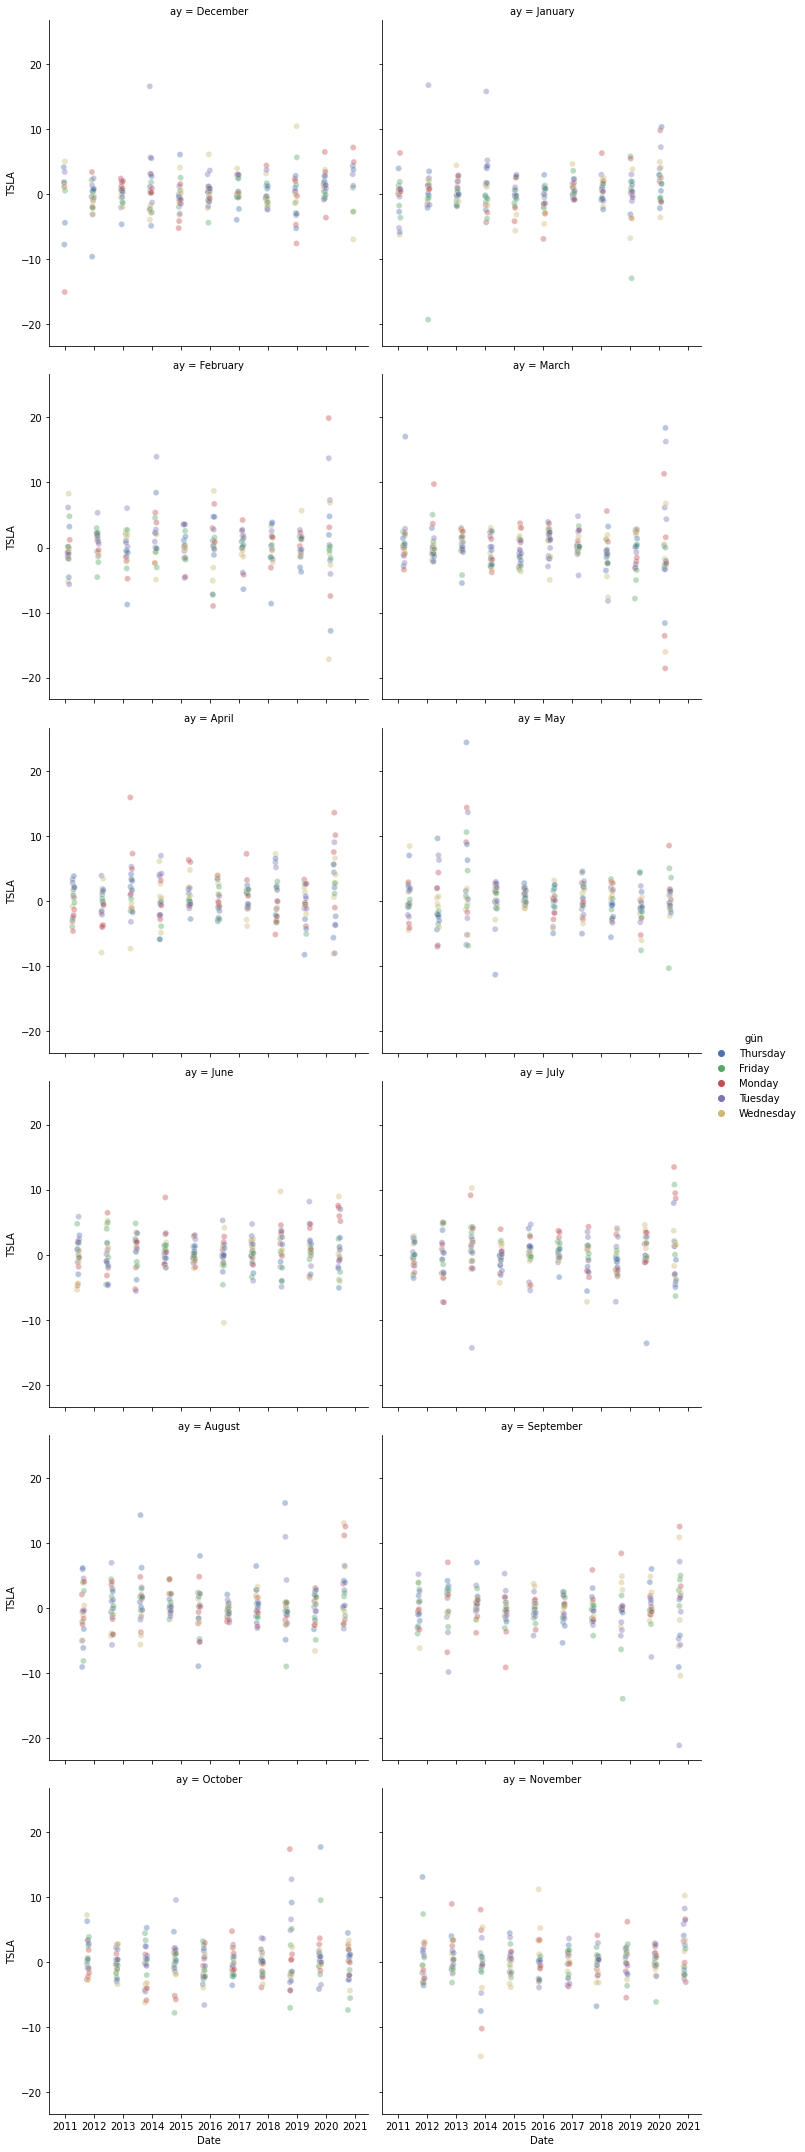

In [331]:
for i in returns.columns[0:4]:
    ax.set_title (str(i)+'Getirisi (%)')
    fig.set_size_inches([10,8])
    sns.relplot(returns.index,returns[i],data = returns, hue="gün", col="ay", col_wrap=2,alpha=0.4)
    ax.set_xlabel("Getiri")
    ax.set_ylabel("Eşit Ağırlıklı Portfolyo Getirisi Bill (%)")
    plt.show()

In [332]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [246]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [333]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(stocks)
S = CovarianceShrinkage(stocks).ledoit_wolf()

In [334]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

In [335]:
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.txt")  
print(cleaned_weights)

OrderedDict([('AAPL', 0.27618), ('AMZN', 0.31634), ('SBUX', 0.16488), ('TSLA', 0.2426)])


In [336]:
from pypfopt import plotting

<AxesSubplot:xlabel='Weight'>

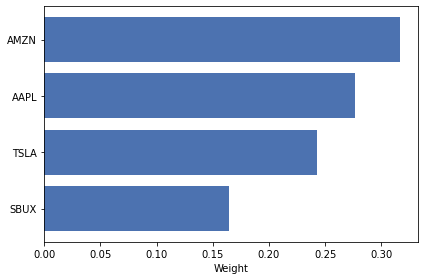

In [337]:
plotting.plot_weights(weights)

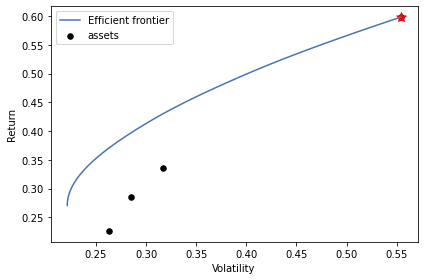

In [338]:
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

plt.show()

In [339]:
returns['optimal_portfolio'] =returns['AAPL']*weights['AAPL']+returns['TSLA']*weights['TSLA']+returns['SBUX']*weights['SBUX']+returns['AMZN']*weights['AMZN']

In [340]:
returns

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,gün,ay,year,optimal_portfolio
Date,,,,,,,,,
2010-12-16,0.277824,1.406856,2.259181,4.087850,2.007928,Thursday,December,2010,1.885985
2010-12-17,-0.199229,-0.258377,0.613695,1.785156,0.485311,Friday,December,2010,0.397507
2010-12-20,0.499052,3.215458,0.426940,1.084151,1.306400,Monday,December,2010,1.488421
2010-12-21,0.617606,0.796551,-0.212548,1.766592,0.742050,Tuesday,December,2010,0.816079
2010-12-22,0.296138,0.005410,0.213001,1.146903,0.415363,Wednesday,December,2010,0.396856
...,...,...,...,...,...,...,...,...,...
2020-12-08,0.509098,0.610835,-0.197224,1.265270,0.546995,Tuesday,December,2020,0.608268
2020-12-09,-2.090376,-2.300385,-0.800322,-6.985904,-3.044247,Wednesday,December,2020,-3.131754
2020-12-10,1.198889,-0.087310,4.970131,3.737096,2.454701,Thursday,December,2020,2.029588


In [341]:
returns.resample('W-FRI').last()

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,gün,ay,year,optimal_portfolio
Date,,,,,,,,,
2010-12-17,-0.199229,-0.258377,0.613695,1.785156,0.485311,Friday,December,2010,0.397507
2010-12-24,-0.479765,-1.174492,-0.910999,-7.784233,-2.587372,Thursday,December,2010,-2.542697
2010-12-31,-0.339877,-1.504786,-0.863899,0.490530,-0.554508,Friday,December,2010,-0.593333
2011-01-07,0.716126,-0.199078,2.565660,1.291244,1.093488,Friday,January,2011,0.871087
2011-01-14,0.809984,1.735571,0.894822,-1.792504,0.411968,Friday,January,2011,0.485413
...,...,...,...,...,...,...,...,...,...
2020-11-20,-1.095743,-0.565281,-0.767198,-1.934826,-1.090762,Friday,November,2020,-1.077325
2020-11-27,0.482629,0.322444,0.468434,2.048780,0.830572,Friday,November,2020,0.809562
2020-12-04,-0.561256,-0.757833,2.167620,0.953853,0.450596,Friday,December,2020,0.194066


In [342]:
returns.resample('BM').last()

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,gün,ay,year,optimal_portfolio
Date,,,,,,,,,
2010-12-31,-0.339877,-1.504786,-0.863899,0.490530,-0.554508,Friday,December,2010,-0.593333
2011-01-31,0.958068,-0.876473,-0.630343,0.374846,-0.043475,Monday,January,2011,-0.025665
2011-02-28,1.450458,-2.228619,1.476910,1.185958,0.471177,Monday,February,2011,0.226804
2011-03-31,-0.034432,0.395725,0.626379,17.039199,4.506718,Thursday,March,2011,4.352649
2011-04-29,0.974762,0.379348,-1.843814,-0.216917,-0.176655,Friday,April,2011,0.032573
...,...,...,...,...,...,...,...,...,...
2020-08-31,3.391206,1.445122,-0.623532,12.568905,4.195425,Monday,August,2020,4.340119
2020-09-30,1.507596,0.122415,1.320756,2.371912,1.330670,Wednesday,September,2020,1.248280
2020-10-30,-5.601789,-5.445646,-1.517579,-5.547305,-4.528080,Friday,October,2020,-4.865762


In [343]:
returns.resample('BY').last()

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,gün,ay,year,optimal_portfolio
Date,,,,,,,,,
2010-12-31,-0.339877,-1.504786,-0.863899,0.490530,-0.554508,Friday,December,2010,-0.593333
2011-12-30,-0.029623,-0.437135,-0.947295,-0.591698,-0.501438,Friday,December,2011,-0.446203
2012-12-31,4.431056,2.320745,1.880711,1.956629,2.647285,Monday,December,2012,2.742674
2013-12-31,1.172182,1.377837,-0.203638,-1.318550,0.256958,Tuesday,December,2013,0.406141
2014-12-31,-1.901860,0.016111,0.317917,0.080998,-0.371709,Wednesday,December,2014,-0.448083
2015-12-31,-1.919503,-1.912724,-1.298915,0.806419,-1.081181,Thursday,December,2015,-1.153728
2016-12-30,-0.779597,-1.996994,-1.420462,-0.461151,-1.164551,Friday,December,2016,-1.193124
2017-12-29,-1.081388,-1.402076,-0.657316,-1.271566,-1.103086,Friday,December,2017,-1.159050
2018-12-31,0.966512,1.620414,1.593312,-0.320482,0.964939,Monday,December,2018,0.964493


In [344]:
en_yüksek_fiy(stocks)

,tarih,fiyat
TSLA,08/12/2020,216.626663
AAPL,01/09/2020,132.360001
SBUX,10/12/2020,101.269363
AMZN,02/09/2020,176.572495


In [345]:
en_düşük_fiy(stocks)

,tarih,fiyat
TSLA,23/02/2011,1.455333
AAPL,20/06/2011,9.599445
SBUX,31/01/2011,12.835041
AMZN,17/03/2011,8.0485


In [346]:
returns

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,gün,ay,year,optimal_portfolio
Date,,,,,,,,,
2010-12-16,0.277824,1.406856,2.259181,4.087850,2.007928,Thursday,December,2010,1.885985
2010-12-17,-0.199229,-0.258377,0.613695,1.785156,0.485311,Friday,December,2010,0.397507
2010-12-20,0.499052,3.215458,0.426940,1.084151,1.306400,Monday,December,2010,1.488421
2010-12-21,0.617606,0.796551,-0.212548,1.766592,0.742050,Tuesday,December,2010,0.816079
2010-12-22,0.296138,0.005410,0.213001,1.146903,0.415363,Wednesday,December,2010,0.396856
...,...,...,...,...,...,...,...,...,...
2020-12-08,0.509098,0.610835,-0.197224,1.265270,0.546995,Tuesday,December,2020,0.608268
2020-12-09,-2.090376,-2.300385,-0.800322,-6.985904,-3.044247,Wednesday,December,2020,-3.131754
2020-12-10,1.198889,-0.087310,4.970131,3.737096,2.454701,Thursday,December,2020,2.029588


In [347]:
returns.iloc[:,[0,1,2,3,4,-1]]

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,optimal_portfolio
Date,,,,,,
2010-12-16,0.277824,1.406856,2.259181,4.087850,2.007928,1.885985
2010-12-17,-0.199229,-0.258377,0.613695,1.785156,0.485311,0.397507
2010-12-20,0.499052,3.215458,0.426940,1.084151,1.306400,1.488421
2010-12-21,0.617606,0.796551,-0.212548,1.766592,0.742050,0.816079
2010-12-22,0.296138,0.005410,0.213001,1.146903,0.415363,0.396856
...,...,...,...,...,...,...
2020-12-08,0.509098,0.610835,-0.197224,1.265270,0.546995,0.608268
2020-12-09,-2.090376,-2.300385,-0.800322,-6.985904,-3.044247,-3.131754
2020-12-10,1.198889,-0.087310,4.970131,3.737096,2.454701,2.029588


In [352]:
en_dusuk_getiri(returns.iloc[:,[0,1,2,3,4,-1]])

,tarih,getiri
TSLA,08/09/2020,-21.062824
AAPL,16/03/2020,-12.864691
SBUX,16/03/2020,-16.204256
AMZN,26/10/2011,-12.656835
eşit_ağırlıklı_port,16/03/2020,-13.254126
optimal_portfolio,16/03/2020,-12.430357


In [357]:
en_yuksek_getiri(returns.iloc[:,[0,1,2,3,4,-1]])

,tarih,getiri
TSLA,09/05/2013,24.395076
AAPL,13/03/2020,11.980825
SBUX,24/03/2020,14.730305
AMZN,27/04/2012,15.745693
eşit_ağırlıklı_port,24/03/2020,10.750809
optimal_portfolio,24/03/2020,9.769057


In [265]:
en_yüksek_fiy(stocks)

,tarih,fiyat
TSLA,08/12/2020,216.626663
AAPL,01/09/2020,132.360001
SBUX,10/12/2020,101.269363
AMZN,02/09/2020,176.572495


In [266]:
en_düşük_fiy(stocks)

,tarih,fiyat
TSLA,23/02/2011,1.455333
AAPL,20/06/2011,9.599445
SBUX,31/01/2011,12.835041
AMZN,17/03/2011,8.0485


In [267]:
stocks.resample('BY').first()

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-31,9.752877,8.778500,12.973446,1.973333
2011-12-30,10.033264,9.211000,13.535212,1.774667
2012-12-31,12.519280,8.951500,18.715250,1.872000
2013-12-31,16.862829,12.865500,23.062454,2.357333
2014-12-31,17.415525,19.898500,32.787899,10.006667
2015-12-31,24.603201,15.426000,35.122654,14.620667
2016-12-30,24.111496,31.849501,50.899265,14.894000
2017-12-29,27.174755,37.683498,49.080551,14.466000
2018-12-31,40.950504,59.450500,52.051006,21.368668


In [268]:
stocks.loc['2011-01-03',:]

AAPL    10.033264
AMZN     9.211000
SBUX    13.535212
TSLA     1.774667
Name: 2011-01-03 00:00:00, dtype: float64

In [269]:
stocks.resample('BY').last()

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-31,9.819854,9.000000,13.079289,1.775333
2011-12-30,12.329615,8.655000,19.012774,1.904000
2012-12-31,16.344994,12.543500,22.487991,2.258000
2013-12-31,17.663948,19.939501,33.306259,10.028667
2014-12-31,24.839499,15.517500,35.385738,14.827333
2015-12-31,24.090900,33.794498,52.445656,16.000668
2016-12-30,27.097544,37.493500,49.231300,14.246000
2017-12-29,40.230190,58.473499,51.870373,20.756666
2018-12-31,38.061707,75.098503,59.514019,22.186666


In [270]:
stocks.resample('BY').mean()

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-31,9.840987,9.066375,13.247204,1.951500
2011-12-30,11.081564,9.833601,15.534456,1.786984
2012-12-31,17.579520,11.015182,21.338003,2.077907
2013-12-31,14.713781,14.901579,28.489946,6.960082
2014-12-31,20.592402,16.627552,32.354799,14.888606
2015-12-31,27.249668,23.906915,46.278958,15.336193
2016-12-30,24.237950,34.976157,49.803061,13.984484
2017-12-29,35.542361,48.408351,51.249821,20.954420
2018-12-31,45.312169,82.086309,52.555308,21.153995


In [271]:
stocks_haftalık = stocks.resample('W-FRI').last()

In [272]:
stocks_haftalık

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-17,9.760489,8.879000,13.347956,2.090667
2010-12-24,9.851517,9.129500,13.282825,2.006000
2010-12-31,9.819854,9.000000,13.079289,1.775333
2011-01-07,10.232666,9.274500,13.343882,1.882667
2011-01-14,10.608948,9.437500,13.311322,1.716667
...,...,...,...,...
2020-11-20,115.948128,154.970001,93.217003,163.203339
2020-11-27,115.207016,159.766998,94.802505,195.253326
2020-12-04,120.799873,158.128998,98.280960,199.679993


In [273]:
returns_haftalık = returns.resample('w-FRI').mean()

In [274]:
returns_haftalık

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,year,optimal_portfolio
Date,,,,,,,
2010-12-17,0.039297,0.574239,1.436438,2.936503,1.246620,2010.0,1.141746
2010-12-24,0.233258,0.710732,-0.120902,-0.946647,-0.030890,2010.0,0.039664
2010-12-31,-0.063843,-0.281359,-0.307551,-2.133818,-0.696643,2010.0,-0.675010
2011-01-07,0.829688,0.608896,0.425980,1.191002,0.763892,2011.0,0.780932
2011-01-14,0.727256,0.352289,-0.045158,-1.806191,-0.192951,2011.0,-0.133332
...,...,...,...,...,...,...,...
2020-11-20,-0.320491,-0.187465,0.308317,3.794162,0.898631,2020.0,0.823481
2020-11-27,-0.146373,0.768448,0.424611,4.602871,1.412389,2020.0,1.389331
2020-12-04,0.962209,-0.201585,0.727875,0.493735,0.495558,2020.0,0.441763


In [275]:
stocks_haftalık = returns.resample('w-FRI').last()
returns_haftalık = returns.resample('w-FRI').mean()
stocks_returns_haftalık = pd.merge(stocks_haftalık, returns_haftalık, on='Date', suffixes=('_stocks', '_returns'))
year=stocks_haftalık.merge(returns_haftalık,how='inner',left_on='year', right_on='year').set_index('year')
stocks_year_last = stocks.resample('Y').last()
stocks_year_first = stocks.resample('Y').first()
returns_year_mean= returns.resample('Y').mean()
result = pd.concat([stocks_year_first, stocks_year_last, returns_year_mean], axis=1)

In [276]:
result

,AAPL,AMZN,SBUX,TSLA,AAPL,AMZN,SBUX,TSLA,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,year,optimal_portfolio
Date,,,,,,,,,,,,,,,
2010-12-31,9.752877,8.778500,12.973446,1.973333,9.819854,9.000000,13.079289,1.775333,0.062946,0.234964,0.077410,-0.780243,-0.101230,2010.0,-0.084809
2011-12-31,10.033264,9.211000,13.535212,1.774667,12.329615,8.655000,19.012774,1.904000,0.103980,0.013856,0.171002,0.078555,0.091848,2011.0,0.080353
2012-12-31,12.519280,8.951500,18.715250,1.872000,16.344994,12.543500,22.487991,2.258000,0.129870,0.168025,0.083372,0.124813,0.126520,2012.0,0.133046
2013-12-31,16.862829,12.865500,23.062454,2.357333,17.663948,19.939501,33.306259,10.028667,0.047173,0.198451,0.163387,0.681907,0.272730,2013.0,0.268176
2014-12-31,17.415525,19.898500,32.787899,10.006667,24.839499,15.517500,35.385738,14.827333,0.144651,-0.078432,0.030454,0.200779,0.074363,2014.0,0.068868
2015-12-31,24.603201,15.426000,35.122654,14.620667,24.090900,33.794498,52.445656,16.000668,0.001992,0.330832,0.166306,0.059967,0.139774,2015.0,0.147175
2016-12-31,24.111496,31.849501,50.899265,14.894000,27.097544,37.493500,49.231300,14.246000,0.057466,0.058623,-0.017111,-0.016095,0.020721,2016.0,0.027690
2017-12-31,27.174755,37.683498,49.080551,14.466000,40.230190,58.473499,51.870373,20.756666,0.163656,0.185637,0.026727,0.174787,0.137702,2017.0,0.150733
2018-12-31,40.950504,59.450500,52.051006,21.368668,38.061707,75.098503,59.514019,22.186666,-0.005726,0.125554,0.065614,0.093199,0.069660,2018.0,0.071565


In [277]:
returns_year_mean

,AAPL,AMZN,SBUX,TSLA,eşit_ağırlıklı_port,year,optimal_portfolio
Date,,,,,,,
2010-12-31,0.062946,0.234964,0.077410,-0.780243,-0.101230,2010.0,-0.084809
2011-12-31,0.103980,0.013856,0.171002,0.078555,0.091848,2011.0,0.080353
2012-12-31,0.129870,0.168025,0.083372,0.124813,0.126520,2012.0,0.133046
2013-12-31,0.047173,0.198451,0.163387,0.681907,0.272730,2013.0,0.268176
2014-12-31,0.144651,-0.078432,0.030454,0.200779,0.074363,2014.0,0.068868
2015-12-31,0.001992,0.330832,0.166306,0.059967,0.139774,2015.0,0.147175
2016-12-31,0.057466,0.058623,-0.017111,-0.016095,0.020721,2016.0,0.027690
2017-12-31,0.163656,0.185637,0.026727,0.174787,0.137702,2017.0,0.150733
2018-12-31,-0.005726,0.125554,0.065614,0.093199,0.069660,2018.0,0.071565


In [278]:
stocks_year_last

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-31,9.819854,9.000000,13.079289,1.775333
2011-12-31,12.329615,8.655000,19.012774,1.904000
2012-12-31,16.344994,12.543500,22.487991,2.258000
2013-12-31,17.663948,19.939501,33.306259,10.028667
2014-12-31,24.839499,15.517500,35.385738,14.827333
2015-12-31,24.090900,33.794498,52.445656,16.000668
2016-12-31,27.097544,37.493500,49.231300,14.246000
2017-12-31,40.230190,58.473499,51.870373,20.756666
2018-12-31,38.061707,75.098503,59.514019,22.186666


In [279]:
stocks_year_first

,AAPL,AMZN,SBUX,TSLA
Date,,,,
2010-12-31,9.752877,8.778500,12.973446,1.973333
2011-12-31,10.033264,9.211000,13.535212,1.774667
2012-12-31,12.519280,8.951500,18.715250,1.872000
2013-12-31,16.862829,12.865500,23.062454,2.357333
2014-12-31,17.415525,19.898500,32.787899,10.006667
2015-12-31,24.603201,15.426000,35.122654,14.620667
2016-12-31,24.111496,31.849501,50.899265,14.894000
2017-12-31,27.174755,37.683498,49.080551,14.466000
2018-12-31,40.950504,59.450500,52.051006,21.368668
